In [1]:
from PIL import Image
import torch
from torchvision import transforms
import re
import glob
import os
import numpy as np
import imp
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import pickle
import seaborn as sns
#from tqdm import tqdm_notebook as tqdm
import tqdm
import imp
from IPython.display import display, HTML
from sklearn.mixture import GaussianMixture
from scipy import stats
import json

import Prediction.dataset as dataset
from Prediction.detector import Detector_v4, Detector_v3
import Prediction.visualize as visualize
import Prediction.calibration as calib
#from Prediction.calibration import MTX, DIST, get_undistort_mapping, undistort_image, undistort_point

from Prediction.kalman_predict import KalmanPredictor
from Prediction.predictor import HitPredictor
from Prediction.visualize import process_video, get_correction_fn, offline_predictor_visualizer
from Prediction import predictor

WEIGHTS_PATH = 'Prediction/Yolo4/yolo4_gs_best_2306.weights'
CFG_PATH = 'Prediction/Yolo4/yolo4_2306.cfg'
#CFG_PATH = 'Prediction/Yolo4/yolo4_2306_384.cfg'
#CFG_PATH = 'Prediction/Yolo4/yolo4_2306_352.cfg'

In [25]:
first_date = dataset.ret_date("Pogona_Pursuit/Arena/experiments/circle_20200803T075244")
first_date = None
im = cv.imread('../Calib_frames/blk_sqr.jpg')

(mapx, mapy), roi, newcameramtx = calib.get_undistort_mapping(1440,1080)

aff, aff_im, p = calib.calibrate(calib.undistort_image(im,(mapx,mapy)))

df = dataset.get_unified_dataframe(vid_dims = (1440,1080), 
                                   first_date = first_date,
                                   align_touch_screen=True,
                                   add_dlc=False, multi_index=True,to_correct=True)

traj_predictor = ConstantVelocityKalmanPredictor(60)

hit_predictor = HitPredictor(trajectory_predictor = traj_predictor,prediction_y_threshold=50,y_thresh_above=False)

EXP_BASE = '../../Pogona_Pursuit/Arena/experiments/'

trial = ('line_20200803T081429',1)
vid_path,_ = dataset.get_trial_path(os.path.join(EXP_BASE,trial[0]),1)
bboxes = df.loc[trial][['x1','y1','x2','y2']].values
out_path = "../labelled/visualizer_test_2908.mp4"

AttributeError: module 'Prediction.calibration' has no attribute 'calibrate'

In [695]:
json_paths = '../../Pogona_Pursuit/Arena/experiments/*/*/rt_data/vid_stats.json'

In [698]:
all_json_paths = glob.glob(json_paths)

In [256]:
import json

In [697]:
width=1440

In [700]:
for json_path in all_json_paths:
    with open(json_path, 'r') as f:
        d = json.load(f)
    d.pop('affine_mat')
    if d['width'] == width:
        d['homography'] = h_old.tolist()
    else:
        d['homography'] = None
    
    with open(json_path, 'w') as f:
        json.dump(d, f)

In [11]:
a = list(map(lambda x: os.path.join(x, "1950648.avi"), glob.glob("../../Pogona_Pursuit/Arena/output/*feeding*")))

In [16]:
glob.glob("../../Pogona_Pursuit/Arena/experiments/*/trial*/videos/*")

['../../Pogona_Pursuit/Arena/experiments/initial_20200727T071226/trial1/videos/20200727-071227',
 '../../Pogona_Pursuit/Arena/experiments/initial_20200727T073708/trial1/videos/20200727-073709',
 '../../Pogona_Pursuit/Arena/experiments/initial_20200727T073708/trial2/videos/20200727-074341',
 '../../Pogona_Pursuit/Arena/experiments/initial_20200727T073708/trial3/videos/20200727-075013',
 '../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial1/videos/20200727-080358',
 '../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial2/videos/20200727-081031',
 '../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial3/videos/20200727-081705',
 '../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial4/videos/20200727-082337',
 '../../Pogona_Pursuit/Arena/experiments/fps_check_20200727T083454/trial1/videos/20200727-083455',
 '../../Pogona_Pursuit/Arena/experiments/fps_check_20200727T083454/trial2/videos/20200727-084127',
 '../../Pogona_Pursuit

In [43]:
import shutil

In [44]:
rt_folders = glob.glob("../../Pogona_Pursuit/Arena/experiments/*/*/rt_data")

In [58]:
src_dest = list(map(lambda p: (p, glob.glob(os.path.join(os.path.split(p)[0], "videos","*"))[0]), rt_folders))

In [61]:
for src, dest in src_dest[1:]:
    print(src, dest)
    shutil.move(src, dest)

../../Pogona_Pursuit/Arena/experiments/line_20200803T081735/trial1/rt_data ../../Pogona_Pursuit/Arena/experiments/line_20200803T081735/trial1/videos/20200803-081735
../../Pogona_Pursuit/Arena/experiments/line_20200803T082002/trial1/rt_data ../../Pogona_Pursuit/Arena/experiments/line_20200803T082002/trial1/videos/20200803-082002
../../Pogona_Pursuit/Arena/experiments/fast_line_20200803T082414/trial1/rt_data ../../Pogona_Pursuit/Arena/experiments/fast_line_20200803T082414/trial1/videos/20200803-082414
../../Pogona_Pursuit/Arena/experiments/fast_line_20200803T082724/trial1/rt_data ../../Pogona_Pursuit/Arena/experiments/fast_line_20200803T082724/trial1/videos/20200803-082724
../../Pogona_Pursuit/Arena/experiments/circle_20200803T084227/trial1/rt_data ../../Pogona_Pursuit/Arena/experiments/circle_20200803T084227/trial1/videos/20200803-084228
../../Pogona_Pursuit/Arena/experiments/circle_20200803T084227/trial2/rt_data ../../Pogona_Pursuit/Arena/experiments/circle_20200803T084227/trial2/video

In [10]:
det = Detector_v4()

Detector initiated successfully


In [4]:
dataset.analyze_rt_data('../../Pogona_Pursuit/Arena/output/feeding_4_20200830-125905', det)


Saved ../../Pogona_Pursuit/Arena/output/feeding_4_20200830-125905/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding_4_20200830-125905/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding_4_20200830-125905/rt_data/vid_stats.json


In [26]:
det = Detector_v4()

Detector initiated successfully


In [ ]:
imp.reload(dataset)
dataset.analyze_new_data(det)

Analyzing ../../Pogona_Pursuit/Arena/output/feeding_4_screen_20200830-130446:



Saved ../../Pogona_Pursuit/Arena/output/feeding_4_screen_20200830-130446/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding_4_screen_20200830-130446/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding_4_screen_20200830-130446/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131348:



Saved ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131348/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131348/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131348/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131916:
ERROR:
Some of the polygons are too close to each other.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131916/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131916/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131916/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131916/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding3_20200902-113026:
ERROR:
Could not find 4 square marks in the image, only 3 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding3_20200902-113026/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding3_20200902-113026/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-113026/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-113026/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122338:
ERROR:
Could not find 4 square marks in the image, only 3 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122338/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122338/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122338/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122338/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122611:



Saved ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122611/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122611/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122611/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding3_20200902-142400:
ERROR:
Could not find 4 square marks in the image, only 1 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding3_20200902-142400/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding3_20200902-142400/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-142400/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-142400/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132659:
ERROR:
Could not find 4 square marks in the image, only 3 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132659/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132659/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132659/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132659/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132954:
ERROR:
Could not find 4 square marks in the image, only 2 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132954/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132954/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132954/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132954/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140215:
ERROR:
Could not find 4 square marks in the image, only 2 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140215/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140215/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140215/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140215/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140800:
ERROR:
Could not find 4 square marks in the image, only 3 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140800/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140800/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140800/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140800/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding3_20200902-145846:
ERROR:
Could not find 4 square marks in the image, only 3 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding3_20200902-145846/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding3_20200902-145846/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-145846/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-145846/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial1/videos/20200727-080358:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial1/videos/20200727-080358/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial1/videos/20200727-080358/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial1/videos/20200727-080358/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial1/videos/20200727-080358/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial2/videos/20200727-081031:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial2/videos/20200727-081031/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial2/videos/20200727-081031/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial2/videos/20200727-081031/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial2/videos/20200727-081031/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial3/videos/20200727-081705:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial3/videos/20200727-081705/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial3/videos/20200727-081705/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial3/videos/20200727-081705/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial3/videos/20200727-081705/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial4/videos/20200727-082337:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial4/videos/20200727-082337/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial4/videos/20200727-082337/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial4/videos/20200727-082337/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial4/videos/20200727-082337/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/test_20200727T100404/trial1/videos/20200727-100404:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/test_20200727T100404/trial1/videos/20200727-100404/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/test_20200727T100404/trial1/videos/20200727-100404/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/test_20200727T100404/trial1/videos/20200727-100404/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/test_20200727T100404/trial1/videos/20200727-100404/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial1/videos/20200729-084032:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial1/videos/20200729-084032/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial1/videos/20200729-084032/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial1/videos/20200729-084032/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial1/videos/20200729-084032/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial2/videos/20200729-084703:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial2/videos/20200729-084703/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial2/videos/20200729-084703/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial2/videos/20200729-084703/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial2/videos/20200729-084703/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/worm_20200729T090421/trial1/videos/20200729-090421:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/worm_20200729T090421/trial1/videos/20200729-090421/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/worm_20200729T090421/trial1/videos/20200729-090421/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/worm_20200729T090421/trial1/videos/20200729-090421/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/worm_20200729T090421/trial1/videos/20200729-090421/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial2/videos/20200729-103756:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial2/videos/20200729-103756/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial2/videos/20200729-103756/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial2/videos/20200729-103756/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial2/videos/20200729-103756/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial3/videos/20200729-104429:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial3/videos/20200729-104429/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial3/videos/20200729-104429/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial3/videos/20200729-104429/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial3/videos/20200729-104429/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/fast_cockroach_20200729T105342/trial1/videos/20200729-105345:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/fast_cockroach_20200729T105342/trial1/videos/20200729-105345/19506468.avi


found with brightness: 0, contrast: 3.0


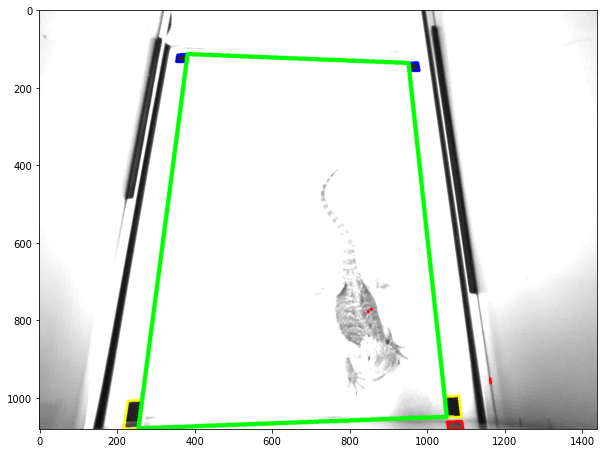

In [7]:
# problematic video (reflection is added to sticker):
# "../../Pogona_Pursuit/Arena/output/feeding3_20200902-122338/19506468.avi"
# "../../Pogona_Pursuit/Arena/output/feeding3_20200902-122611/19506468.avi"
vcap = cv.VideoCapture("../../Pogona_Pursuit/Arena/output/feeding3_20200902-122338/19506468.avi")
h, h_im = dataset.get_homography_from_video(vcap, undist_alpha=0)
#h, h_im = dataset.get_homography_from_video(vcap, undist_alpha=0.3, min_near_edge_size=20)
plt.figure(figsize=(10,15))
plt.imshow(h_im)
#plt.imshow(calib.transform_image(h_im, h))

## Videos with undist_alpha=0.3

In [96]:
# TODO with GPU

paths = [
    "../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T152020/trial1/videos/20200907-152021",
    "../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T152020/trial2/videos/20200907-152653",
    "../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T152020/trial3/videos/20200907-153326",
    "../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T145302/trial1/videos/20200907-145302",
    "../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T145302/trial2/videos/20200907-145935",
    "../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T145302/trial3/videos/20200907-150607",
    "../../Pogona_Pursuit/Arena/experiments/circle_20200907T145105/trial1/videos/20200907-145106",
]

In [179]:
det = Detector_v4()

Detector initiated successfully


In [105]:
for path in paths:
    print(path)
    #dataset.analyze_rt_data(path, det, undist_alpha=0.3, homography_args={"min_near_edge_size": 20})
    #dataset.save_homography_data(path)
    dataset.save_homography_data(path, undist_alpha=0.3, homography_args={"min_near_edge_size": 20})

../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T152020/trial1/videos/20200907-152021
Could not find homography: Could not find 2 far and 2 near square marks in the image.
../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T152020/trial2/videos/20200907-152653


KeyboardInterrupt: 

In [2]:
imp.reload(dataset)

<module 'Prediction.dataset' from '/app/Pogona_realtime/Arena/Prediction/dataset.py'>

In [3]:
df = dataset.collect_data(data_sources={'detections': True, 'timestamps': True, 'dlc': False, 'touches': True})

84 trials loaded


In [45]:
feeding_data = df.filter(like='feeding',axis=0)

(-771.4691963159088,
 2587.0149660653124,
 -239.45547903306533,
 3413.2016656515307)

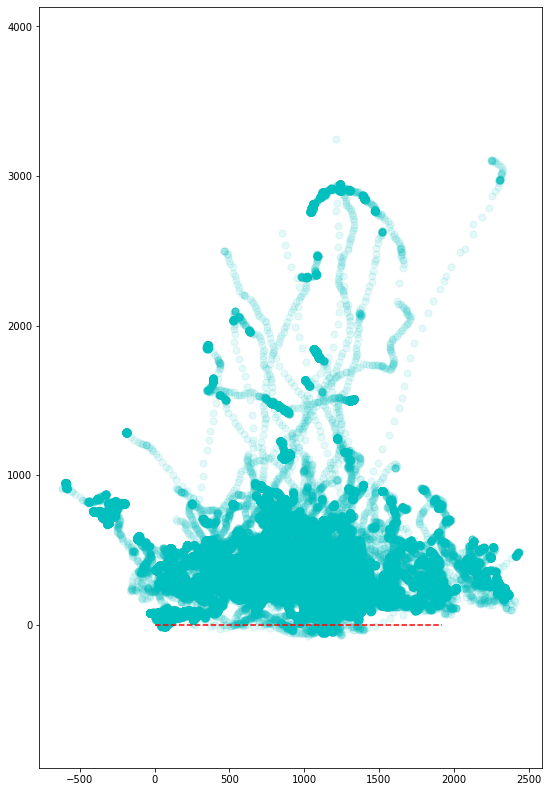

In [66]:
plt.figure(figsize=(9,14))
feeding = df.index.str.contains('feeding') & ~df.index.str.contains('feeding3_20200902-142400_None')
experi =  ~df.index.str.contains('feeding')
#plt.scatter(df[~mask].x2, df[~mask].y2, color='g' ,alpha=0.02)
plt.scatter(df[experi].cent_x, df[experi].cent_y, color='c' ,alpha=0.1,s=50,zorder=2)

#plt.plot(df[mask].x2, df[mask].y2, color='k' ,alpha=0.6,zorder=0)

#trial = np.random.choice(df.index.unique())
#plt.plot(df.loc[trial].x2, df.loc[trial].y2, color='k' ,alpha=0.9,zorder=0)


#sns.jointplot(df.x2, df.y2, kind='hex',)
plt.plot(np.linspace(0,1920,num=10),np.zeros(10),color='r',linestyle='--')
plt.axis('equal')

# Aruco calibration

In [52]:
aruco_paths = glob.glob(os.path.join(dataset.OUTPUT_ROOT,'aruco_test_final*'))
rt_aruco_vids = [os.path.join(p,'19506468.avi') for p in aruco_paths]

In [53]:
for aruco_vid in rt_aruco_vids:
    fname = os.path.split(os.path.split(aruco_vid)[0])[1]
    print(fname)
    visualize.process_video(video_path=aruco_vid,
                            output_path=None,
                           process_fns=[visualize.video_sampler('../aruco_frames/',100,fname)])

aruco_test_final_20200909-175108


In [27]:
mapping, _, newcammat = calib.get_undistort_mapping(1440,1080)

In [4]:
aruco_img_paths = glob.glob(os.path.join('../aruco_frames','aruco_test_final*'))

In [30]:
imp.reload(calib)
imp.reload(predictor)

<module 'Prediction.predictor' from '/app/Pogona_realtime/Arena/Prediction/predictor.py'>

In [11]:
from Prediction import seq2seq_predict

In [12]:
weights_path_encdec = 'Prediction/traj_models/model_20_20_h64_b64_l1_EncDec_6_best.pth'
weights_path_lstmdense = 'Prediction/traj_models/model_20_20_h64_b128_l1_lstmDense_feeding_51_best.pth'
traj_model_encdec = seq2seq_predict.GRUEncDec()
traj_model_lstmdense = seq2seq_predict.LSTMdense(output_seq_size=20,hidden_size=64,LSTM_layers=1, embedding_size=16)
history_len = 20
forecast_horizon = 20

traj_gru = seq2seq_predict.Seq2SeqPredictor(model=traj_model_encdec, 
                                            weights_path=weights_path_encdec,
                                           history_len=history_len, forecast_horizon=forecast_horizon)

traj_lstm = seq2seq_predict.Seq2SeqPredictor(model = traj_model_lstmdense,
                                            weights_path=weights_path_lstmdense,
                                            history_len=history_len,
                                            forecast_horizon=forecast_horizon)

In [13]:
hit_pred = predictor.HitPredictor(trajectory_predictor=traj_lstm,detector=det)

In [20]:
img = cv.imread(aruco_img_paths[0])

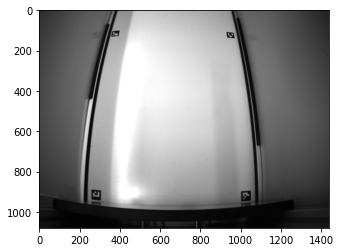

In [21]:
plt.imshow(img)

In [22]:
h, h_img, error = hit_pred.calibrate(img)

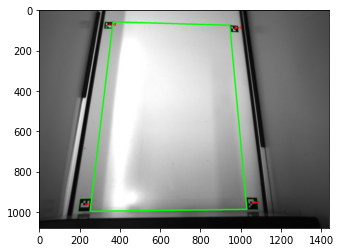

In [23]:
plt.imshow(h_img)

In [15]:
hit_pred.correct_detection(np.array([0.22, 543.435, 0.435, 234.43]))

array([3124.88503824, 3148.91737701, 3125.3956572 , 3150.45673698])

In [5]:
mapping, _, newcammat = calib.get_undistort_mapping(1440,1080)
calib.undistort_point([0,np.nan], newcammat)

(nan, nan)

In [ ]:
hitp 